In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import scipy.stats as stats
import os

# Reading the File

### The below Data is scraped from the cricinfo and cleaned separately and dumped in this CSV

In [2]:
match_data = pd.read_csv('Data/Match Data.csv',index_col=0)

In [3]:
match_data.head()

,ID,SEASON,CITY,CITY_Corrrected,TEAM1,TEAM1_MODEL,TEAM2,TEAM2_MODEL,TOSS_WINNER,TOSS_DECISION,RESULT,WINNER,WIN_BY_RUNS,TOSS_WINNER_MODEL,WINNER_MODEL,TOSS_DECISION_MODEL,CITY_MODEL,TEAM1_WIN_RATE,TEAM2_WIN_RATE
0,60,2008,Bangalore,RCB,KKR,1,RCB,0,RCB,field,normal,KKR,140,0,1,0,0,0.0,0.0
1,61,2008,Chandigarh,KXIP,CSK,1,KXIP,0,CSK,bat,normal,CSK,33,1,1,1,0,0.0,0.0
2,62,2008,Delhi,DD,DD,1,RR,0,RR,bat,normal,DD,0,0,1,1,1,0.0,0.0
3,63,2008,Mumbai,MI,RCB,1,MI,0,MI,bat,normal,RCB,0,0,1,1,0,0.0,0.0
4,64,2008,Kolkata,KKR,KKR,1,SRH,0,SRH,bat,normal,KKR,0,0,1,1,1,1.0,0.0


In [4]:
match_data.columns

Index(['ID', 'SEASON', 'CITY', 'CITY_Corrrected', 'TEAM1', 'TEAM1_MODEL',
       'TEAM2', 'TEAM2_MODEL', 'TOSS_WINNER', 'TOSS_DECISION', 'RESULT',
       'WINNER', 'WIN_BY_RUNS', 'TOSS_WINNER_MODEL', 'WINNER_MODEL',
       'TOSS_DECISION_MODEL', 'CITY_MODEL', 'TEAM1_WIN_RATE',
       'TEAM2_WIN_RATE'],
      dtype='object')

# Label Encoding

<dl>
  <dt>TEAM1_MODEL and TEAM2_MODEL</dt>
      <dd>- Team 1 = 1</dd>
      <dd>- Team 2 = 0</dd>
  <dt>TOSS_WINNER_MODEL</dt>
      <dd>- Team 1 Toss Win = 1</dd>
      <dd>- Team 2 Toss Win = 0</dd>
  <dt>WINNER_MODEL</dt>
      <dd>- Team 1 Winner = 1</dd>
      <dd>- Team 2 Winner = 0</dd>
  <dt>CITY_MODEL</dt>
      <dd>- Team 1 Venue = 1</dd>
      <dd>- Team 2 Venue = 0</dd>
      <dd>- Outside Venue = 2</dd>
  <dt>TOSS_DECISION_MODEL</dt>
      <dd>- Field = 1</dd>
      <dd>- Bat = 0 </dd>
</dl>

## Analysis of the Data

### Chi Square Results of Categorical Data

In [5]:
def plot_graph(ct):
    ct.plot.bar(stacked=True)
    plt.legend(title='mark')

    plt.show()

In [6]:
toss_winner = pd.crosstab(match_data['TOSS_WINNER_MODEL'],match_data['WINNER_MODEL'])
toss_winner


WINNER_MODEL,0,1
TOSS_WINNER_MODEL,,
0,227,212
1,146,162


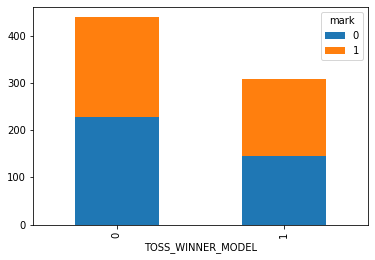

In [7]:
plot_graph(toss_winner)

- Explanation: If Team1(1) wins the toss then Team2(0) wins 146 times while Team1(1) wins 162 times

In [8]:
city_winner = pd.crosstab(match_data['CITY_MODEL'],match_data['WINNER_MODEL'])
city_winner


WINNER_MODEL,0,1
CITY_MODEL,,
0,136,108
1,135,174
2,102,92


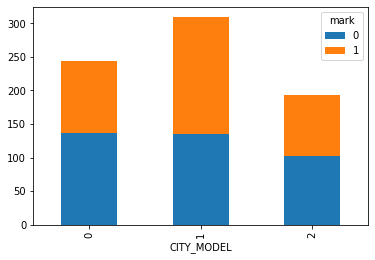

In [9]:
plot_graph(city_winner)

- Explanation: If City_Model = 0 ( Match is played in homeground of Team2) then Team2 wins 136 times and Team1 wins 108 times

In [10]:
descion_winner = pd.crosstab(match_data['TOSS_DECISION_MODEL'],match_data['WINNER_MODEL'])
descion_winner

WINNER_MODEL,0,1
TOSS_DECISION_MODEL,,
0,227,231
1,146,143


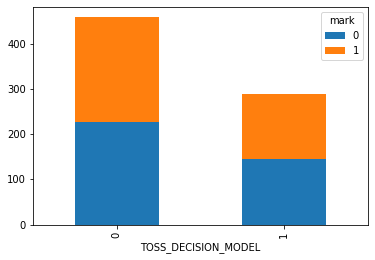

In [11]:
plot_graph(descion_winner)

- Explanation: If TOSS_DECISION_MODEL = 0(Irrespective of who won the toss if winner decision is bat) then Team1 wins 231 times
and Team2 wins 227 times

### Winners Overall

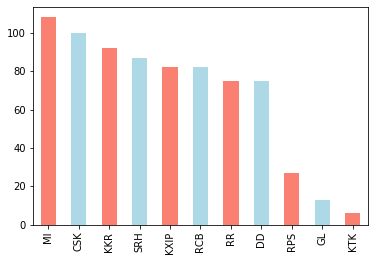

In [12]:
match_data["WINNER"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

# Calculating Win Rate 

- Win Rata for a particular match of a team is calculated solely based on it's past performance.
- Untill a team wins a match the win rate will remain 0
- Eg 2015 MI vs CSK, we will take into account the data from 2008 till 2015 before that match

In [13]:
def update_win_rate(dataframe):
    
    #creating two new columns and setting them to 0 by default
    null_values = []
    for i in range(len(dataframe)):
        null_values.append(0)
    dataframe['TEAM1_WIN_RATE'] = null_values
    dataframe['TEAM2_WIN_RATE'] = null_values


    #initialising the number of matches played by each team to 0
    total_match_team_wise = {'KKR':0,'CSK':0,'RCB':0,'KXIP':0,'DD':0,'SRH':0,'RPS':0,'GL':0,'KTK':0,'RR':0,'MI':0}

    total_matches = 0;
    #initializing the number of matches won by each team to zero
    match_wins_team_wise = {'KKR':0,'CSK':0,'RCB':0,'KXIP':0,'DD':0,'SRH':0,'RPS':0,'GL':0,'KTK':0,'RR':0,'MI':0}
    
    years = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
    
    for k in range(len(dataframe)):
        #we want win_rate of a team before a match so this condition is used
        #so we start calculating winrate only after each team has won a match
        if match_wins_team_wise[dataframe.loc[k,'TEAM1']] > 0: 
            dataframe.loc[k,'TEAM1_WIN_RATE'] = match_wins_team_wise[dataframe.loc[k,'TEAM1']]/total_match_team_wise[dataframe.loc[k,'TEAM1']]
        
        if match_wins_team_wise[dataframe.loc[k,'TEAM2']] >0:#same as before
            dataframe.loc[k,'TEAM2_WIN_RATE'] = match_wins_team_wise[dataframe.loc[k,'TEAM2']]/total_match_team_wise[dataframe.loc[k,'TEAM2']]
        
        #increamenting the match wins,total matches of teams 
        match_wins_team_wise[dataframe.loc[k,'WINNER']] +=1
        total_match_team_wise[dataframe.loc[k,'TEAM1']]+=1;
        total_match_team_wise[dataframe.loc[k,'TEAM2']]+=1;
        
    return dataframe 


In [14]:
match_data_with_win_rate = update_win_rate(match_data)

In [15]:
match_data_with_win_rate.head()

,ID,SEASON,CITY,CITY_Corrrected,TEAM1,TEAM1_MODEL,TEAM2,TEAM2_MODEL,TOSS_WINNER,TOSS_DECISION,RESULT,WINNER,WIN_BY_RUNS,TOSS_WINNER_MODEL,WINNER_MODEL,TOSS_DECISION_MODEL,CITY_MODEL,TEAM1_WIN_RATE,TEAM2_WIN_RATE
0,60,2008,Bangalore,RCB,KKR,1,RCB,0,RCB,field,normal,KKR,140,0,1,0,0,0.0,0.0
1,61,2008,Chandigarh,KXIP,CSK,1,KXIP,0,CSK,bat,normal,CSK,33,1,1,1,0,0.0,0.0
2,62,2008,Delhi,DD,DD,1,RR,0,RR,bat,normal,DD,0,0,1,1,1,0.0,0.0
3,63,2008,Mumbai,MI,RCB,1,MI,0,MI,bat,normal,RCB,0,0,1,1,0,0.0,0.0
4,64,2008,Kolkata,KKR,KKR,1,SRH,0,SRH,bat,normal,KKR,0,0,1,1,1,1.0,0.0


# Comparing columns for strength and win rate

- The below graph shows the relationship between past win rate of a team and its winning
- Eg: If WIN Rate of Team1 > Win Rate of Team2 and Team1 wins then it will be a success otherwise failure AND VICE VERSA


In [16]:
def data_sense(temp_df,col1,col2):
    """Calculates the number of times team1 wins because col1 value is higher or looses because col1 value is lower, can be used for all continuous columns"""
    success=0
    loss =0
    for i in range(len(temp_df)):
        if((temp_df.loc[i,col1] > temp_df.loc[i,col2]) and temp_df.loc[i,'WINNER_MODEL']==1):
            success+=1
        elif((temp_df.loc[i,col1] > temp_df.loc[i,col2]) and temp_df.loc[i,'WINNER_MODEL']==0):
            loss+=1
        elif((temp_df.loc[i,col1] < temp_df.loc[i,col2]) and temp_df.loc[i,'WINNER_MODEL']==0):
            success+=1
        elif((temp_df.loc[i,col1] < temp_df.loc[i,col2]) and temp_df.loc[i,'WINNER_MODEL']==1):
            loss+=1
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    langs = [col1,col2]
    x_axis_data = [success,loss]
    ax.bar(langs[0],x_axis_data[0],color='g')
    ax.bar(langs[1],x_axis_data[1],color='b')
    plt.show()
    return success, loss

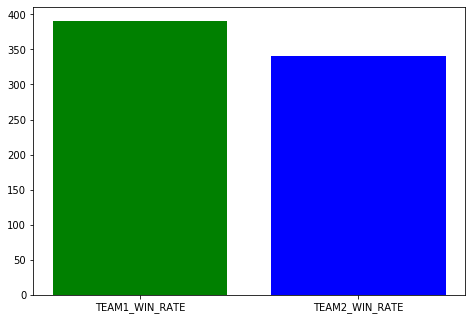

In [17]:
Success , Loss = data_sense(match_data,'TEAM1_WIN_RATE','TEAM2_WIN_RATE')

In [18]:
print ('The successful relation between the win rate and team winning is :' + str(Success) + ' times out of ' + str(Success + Loss))
print ('The failure relation between the win rate and team winning is :' + str(Loss) + ' times out of ' + str(Success + Loss))

The successful relation between the win rate and team winning is :391 times out of 731
The failure relation between the win rate and team winning is :340 times out of 731


# Reading all files

- Reading all the stats of a player to calculate the team strength
- Converting the datatypes for computation

In [19]:
def convert_datatype(dataset):
    #Setting dtypes

    dataset["Batting Innings"] = dataset["Batting Innings"].astype(int)
    dataset["Not out"] = dataset["Not out"].astype(int)
    dataset["Runs"] = dataset["Runs"].astype(int)
    dataset["High Score"] = dataset["High Score"].astype(int)
    dataset["Batting Average"] = dataset["Batting Average"].astype(float)
    dataset["Balls Faced"] = dataset["Balls Faced"].astype(int)
    dataset["Batting SR"] = dataset["Batting SR"].astype(float)
    dataset["100's"] = dataset["100's"].astype(int)
    dataset["50's"] = dataset["50's"].astype(int)
    dataset["0's"] = dataset["0's"].astype(int)
    dataset["4s"] = dataset["4s"].astype(int)
    dataset["6s"] = dataset["6s"].astype(int)
    dataset["Bowling Innings"] = dataset["Bowling Innings"].astype(int)
    dataset["Overs"] = dataset["Overs"].astype(float)
    dataset["Maidens"] = dataset["Maidens"].astype(int)
    dataset["Bowling Runs"] = dataset["Bowling Runs"].astype(int)
    dataset["Wickets"] = dataset["Wickets"].astype(int)
    dataset["Bowling Average"] = dataset["Bowling Average"].astype(float)
    dataset["Bowling Economy"] = dataset["Bowling Economy"].astype(float)
    dataset["Bowling SR"] = dataset["Bowling SR"].astype(float)
    dataset["4W Haul"] = dataset["4W Haul"].astype(int)
    dataset["5W Haul"] = dataset["5W Haul"].astype(int)
    dataset["Year"] = dataset["Year"].astype(int)
    
    return dataset

In [20]:
def read_player_data():
    path = r'Data\AllCSV'
    all_files = glob.glob(path + "/*.csv")
    columns=['Player', 'Matches', 'Batting Innings', 'Not out', 'Runs', 'High Score',
       'Batting Average', 'Balls Faced', 'Batting SR', "100's", "50's", "0's",
       '4s', '6s', 'Bowling Innings', 'Overs', 'Maidens', 'Bowling Runs',
       'Wickets', 'BBI', 'Bowling Average', 'Bowling Economy', 'Bowling SR',
       '4W Haul', '5W Haul', 'Catches', 'Stumpings']
    path
    li = []

    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        df.columns = columns
        df['High Score'] = df['High Score'].astype('str').str.strip('*')
        df["Year"] = filename[-8: -4]                                      #Extracting Year from filename 
        df["Team"] = filename[-13: -9].strip(path[-1]+'\\').upper()        #Extracting Team Name from filename 
        df = df.replace('-','0')
        li.append(df)

    all_years_player_performance = pd.concat(li, axis=0, ignore_index=True)
    all_years_player_performance.drop("BBI", axis=1, inplace=True) #BBI information is not needed
    all_years_player_performance = convert_datatype(all_years_player_performance)
    return all_years_player_performance
    

In [21]:
all_years_player_performance = read_player_data()

# Calculate Player Strength (DREAM11 Formula)

### Concept of Calculating Strength 
    
- Initially we are calculating the strength of an individual player based on DREAM11 formula
- https://get.dream11.help/hc/en-us/articles/360021110932-Fantasy-Cricket-Points-System
- Aggregating the individual strength to calculate the overall team strength of the team.
- Feeding the strength of a team for a season to it's next season
- Eg. strength of MI for season 2010 will be fed to the 2011 season, for the prediction purpose. As while predicting the results of IPL2020 we will not have the strength of IPL2020 player performances. We will predict the results of 2020 based on 2019 IPL performance.

| Team1 | Team2 | Season | Strength1 | Strength2 | Win | Description |
| --- | --- | --- | --- | ---| ---| ---|
| MI | CSK | 2015 | 100 | 110 | MI |(Strength1 and Strength2 is actual strength of 2014) |

- Calculating the strength of a team based on the DREAM11 formula
- https://get.dream11.help/hc/en-us/articles/360021110932-Fantasy-Cricket-Points-System

In [22]:
def player_strength(df):
    """Calculates Player Batting, Bowling and Overall Strength with Dream 11 Formula per inning played
    """
    df['Batting Strength'] = (df['Batting Innings'] != 0).astype(int)*\
    ((df['Runs']+df['4s']+2*df['6s']+8*df["50's"]+16*df["100's"]-2*df["0's"])//df['Batting Innings']\
    +(lambda a: (a<=50)*-6 +((a>50) & (a<=60))*-4 + ((a>60) & (a<=70))*-2)(df['Batting SR']))

    df['Bowling Strength'] = (df['Bowling Innings'] != 0).astype(int)*\
    ((25*df['Wickets']+8*df['Maidens']+8*df['4W Haul']+16*df['5W Haul'])/df['Bowling Innings']\
    +(lambda a: (a>=11)*-6 +((a>=10) & (a<11))*-4 + ((a>=9) & (a<10))*-2)(df['Bowling Economy'])\
    +(lambda a: (a<=4)*6 +((a>4) & (a<=5))*4 + ((a>5) & (a<=6))*2)(df['Bowling Economy']))
   
    df['Strength'] = (df['Runs']+25*df['Wickets']+8*df['Catches']+12*df['Stumpings']+df['4s']+2*df['6s']\
    +8*df["50's"]+16*df["100's"]+8*df['Maidens']+8*df['4W Haul']+16*df['5W Haul']-2*df["0's"]\
    +(lambda a: (a>=11)*-6 +((a>=10) & (a<11))*-4 + ((a>=9) & (a<10))*-2)(df['Bowling Economy'])*df['Bowling Innings']\
    +(lambda a: (a<=4)*6 +((a>4) & (a<=5))*4 + ((a>5) & (a<=6))*2)(df['Bowling Economy'])*df['Bowling Innings']\
    +(lambda a: (a<=50)*-6 +((a>50) & (a<=60))*-4 + ((a>60) & (a<=70))*-2)(df['Batting SR'])*df['Batting Innings'])/df['Matches']

In [23]:
#Run the desired function
player_strength(all_years_player_performance)

In [24]:
all_years_player_performance.fillna(0, inplace=True)

In [25]:
all_years_player_performance.head()

,Player,Matches,Batting Innings,Not out,Runs,High Score,Batting Average,Balls Faced,Batting SR,100's,...,Bowling SR,4W Haul,5W Haul,Catches,Stumpings,Year,Team,Batting Strength,Bowling Strength,Strength
0,MEK Hussey,4,3,1,168,116,84.0,100,168.00,1,...,0.0,0,0,2,0,2008,CSK,72.0,0.000000,58.500000
1,M Ntini,9,2,1,11,11,11.0,18,61.11,0,...,30.0,1,0,1,0,2008,CSK,4.0,22.111111,24.000000
2,ML Hayden,4,4,1,189,81,63.0,131,144.27,0,...,0.0,0,0,0,0,2008,CSK,60.0,0.000000,60.250000
3,M Muralitharan,15,1,0,0,0,0.0,3,0.00,0,...,31.6,0,0,4,0,2008,CSK,-8.0,18.333333,19.933333
4,MS Dhoni,16,14,4,414,65,41.4,310,133.54,0,...,0.0,0,0,6,0,2008,CSK,35.0,0.000000,34.125000


In [26]:
#Initializing the strength columns

all_years_player_performance["Strength For Model"] = 0
all_years_player_performance["Bat Strength For Model"] = 0
all_years_player_performance["Bowl Strength For Model"] = 0
all_years_player_performance["Cumul Strength For Model"] = 0

- Here we have shifted the current year strength to next year(For prediction)
- 'Strength For Model' , 'Bat Strength For Model','Bowl Strength For Model' is shifted strength(Strength)
- 'Cumulative Strength for Model' is the mean strength for all the previous year strengths 
- Eg for MI in 2016 : Strength will be 2015 strength : Cumulative strength will be mean(2015,2014,......2008 strength)

In [27]:
%%time
for a in all_years_player_performance.Player.unique():          #Iteration for Players
    
    #Series of years the player has played sorted in descending order
    b = all_years_player_performance[all_years_player_performance['Player']==a]['Year'].sort_values(ascending=False)
    
    #Mean strength of player over IPL
    c = all_years_player_performance[all_years_player_performance['Player']==a]['Strength'].mean()
    
    #Mean strength of player over IPL
    d = all_years_player_performance[all_years_player_performance['Player']==a]['Batting Strength'].mean()
    
    #Mean strength of player over IPL
    e = all_years_player_performance[all_years_player_performance['Player']==a]['Bowling Strength'].mean()
    
    
    for i in range(len(b)):                     #Iteration over the years
        if sum(b.isin([b[b.index[i]]-1])):      #enters if year-1 is present in b
            #copies value to stren_mod from previous year stren_calc
            all_years_player_performance.loc[b.index[i],'Strength For Model'] = all_years_player_performance.loc[b.index[i+1],'Strength']   
        else:                                   #enters when previous year is not available
            #Mean strength of player over IPL is imputed
            all_years_player_performance.loc[b.index[i],'Strength For Model'] = c

        if sum(b.isin([b[b.index[i]]-1])):      #enters if year-1 is present in b
            #copies value to stren_mod from previous year stren_calc
            all_years_player_performance.loc[b.index[i],'Bat Strength For Model'] = all_years_player_performance.loc[b.index[i+1],'Batting Strength']   
        else:                                   #enters when previous year is not available
            #Mean strength of player over IPL is imputed
            all_years_player_performance.loc[b.index[i],'Bat Strength For Model'] = d

        if sum(b.isin([b[b.index[i]]-1])):      #enters if year-1 is present in b
            #copies value to stren_mod from previous year stren_calc
            all_years_player_performance.loc[b.index[i],'Bowl Strength For Model'] = all_years_player_performance.loc[b.index[i+1],'Bowling Strength']   
        else:                                   #enters when previous year is not available
            #Mean strength of player over IPL is imputed
            all_years_player_performance.loc[b.index[i],'Bowl Strength For Model'] = e

            
        #Cumulative Strength over all years played
        if i < len(b)-1:
            all_years_player_performance.loc[b.index[i],'Cumul Strength For Model'] = all_years_player_performance.loc[b.index[i+1:], 'Strength'].mean()
        else:
            all_years_player_performance.loc[b.index[i],'Cumul Strength For Model'] = c

Wall time: 5.76 s


In [28]:
all_years_player_performance.head()

,Player,Matches,Batting Innings,Not out,Runs,High Score,Batting Average,Balls Faced,Batting SR,100's,...,Stumpings,Year,Team,Batting Strength,Bowling Strength,Strength,Strength For Model,Bat Strength For Model,Bowl Strength For Model,Cumul Strength For Model
0,MEK Hussey,4,3,1,168,116,84.0,100,168.00,1,...,0,2008,CSK,72.0,0.000000,58.500000,39.357860,38.571429,0.000000,39.357860
1,M Ntini,9,2,1,11,11,11.0,18,61.11,0,...,0,2008,CSK,4.0,22.111111,24.000000,24.000000,4.000000,22.111111,24.000000
2,ML Hayden,4,4,1,189,81,63.0,131,144.27,0,...,0,2008,CSK,60.0,0.000000,60.250000,50.854167,48.333333,0.000000,50.854167
3,M Muralitharan,15,1,0,0,0,0.0,3,0.00,0,...,0,2008,CSK,-8.0,18.333333,19.933333,25.098718,-1.333333,23.186966,25.098718
4,MS Dhoni,16,14,4,414,65,41.4,310,133.54,0,...,0,2008,CSK,35.0,0.000000,34.125000,34.630915,31.166667,0.000000,34.630915


(-10, 100)

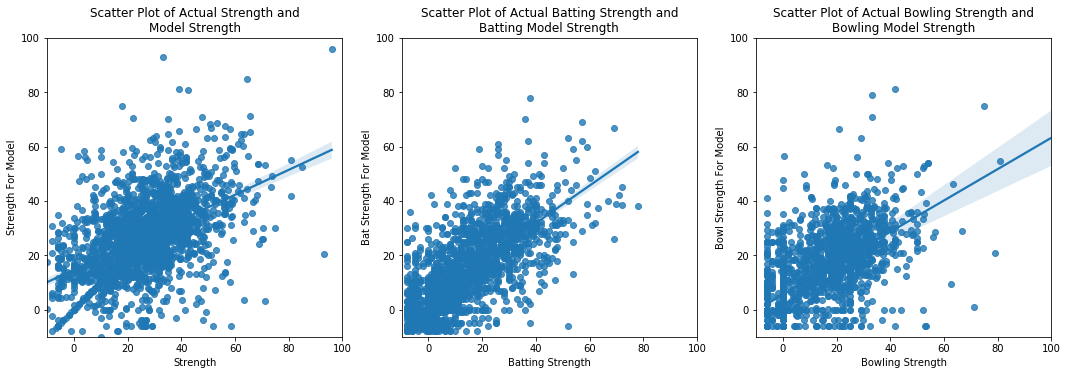

In [29]:
plt.figure(figsize=(18,5.5))
plt.subplot(131)
sns.regplot(x=all_years_player_performance['Strength'], y=all_years_player_performance['Strength For Model'])
plt.title('Scatter Plot of Actual Strength and\nModel Strength')
plt.xlim(-10, 100);plt.ylim(-10, 100)
plt.subplot(132)
sns.regplot(x=all_years_player_performance['Batting Strength'], y=all_years_player_performance['Bat Strength For Model'])
plt.title('Scatter Plot of Actual Batting Strength and\nBatting Model Strength')
plt.xlim(-10, 100);plt.ylim(-10, 100)
plt.subplot(133)
sns.regplot(x=all_years_player_performance['Bowling Strength'], y=all_years_player_performance['Bowl Strength For Model'])
plt.title('Scatter Plot of Actual Bowling Strength and\nBowling Model Strength')
plt.xlim(-10, 100);plt.ylim(-10, 100)

- Actual Strength is the strength of the same season
- Strength is the strength of a season before that we will feed into the model

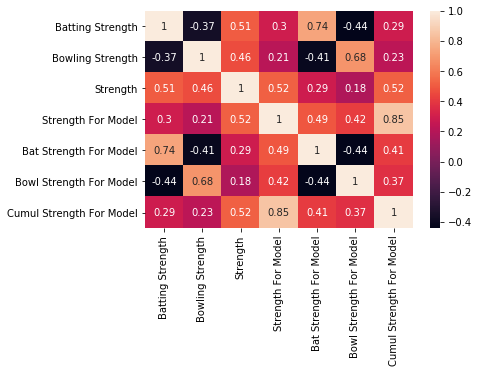

In [30]:
ax = sns.heatmap(all_years_player_performance.loc[:,all_years_player_performance.columns[-8:]].corr('spearman'), annot=True)

- Here we have the strength of a player according to the formula
- Aggregating the individual strength into the team strength of a team

In [31]:
team_stren = \
all_years_player_performance.groupby(['Team', 'Year']).apply(lambda a: a["Strength For Model"].sort_values(ascending=False)[:11].sum()/max(a["Matches"]))

cum_team_stren = \
all_years_player_performance.groupby(['Team', 'Year']).apply(lambda a: sum(a["Cumul Strength For Model"].sort_values(ascending=False)[:11])/max(a["Matches"]))

team_bat_stren = \
all_years_player_performance.groupby(['Team', 'Year']).apply(lambda a: a["Bat Strength For Model"].sort_values(ascending=False)[:11].sum()/max(a["Matches"]))

team_bowl_stren = \
all_years_player_performance.groupby(['Team', 'Year']).apply(lambda a: sum(a["Bowl Strength For Model"].sort_values(ascending=False)[:11])/max(a["Matches"]))

In [32]:
#new = all_years_player_performance.groupby(['Year','Team'])['Player','Strength For Model','Team'].apply(lambda x: x.nlargest(11, columns=['Strength For Model']))

In [33]:
TeamStrength = pd.concat([
                          team_stren,                          
                          team_bat_stren,
                          team_bowl_stren,
                          cum_team_stren], axis=1) 
TeamStrength.columns= [
                       'Team_Strength',                        
                       'Batting_Team_Strength',
                       'Bowling_Team_Strength',
                       'Cumulative_Team_Strength']
TeamStrength.describe()

,Team_Strength,Batting_Team_Strength,Bowling_Team_Strength,Cumulative_Team_Strength
count,100.000000,100.000000,100.000000,100.000000
mean,26.702428,17.165134,16.557766,26.038402
std,3.327214,2.560715,3.742815,3.014527
min,20.436569,11.491228,9.742660,19.937809
25%,24.262769,15.424370,14.306860,23.732599
50%,26.086471,17.060897,15.959770,25.800766
75%,28.765631,18.469538,18.225869,27.672141
max,35.255482,24.428571,39.307236,34.679584


Text(0.5, 1.0, 'Scatter Plot of Team Strength and\nCumulative Team Strength')

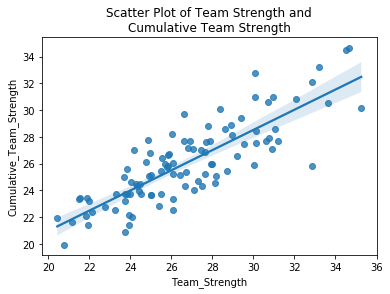

In [34]:
sns.regplot(x=TeamStrength.loc[:,'Team_Strength'], y=TeamStrength.loc[:,'Cumulative_Team_Strength'])
plt.title('Scatter Plot of Team Strength and\nCumulative Team Strength')

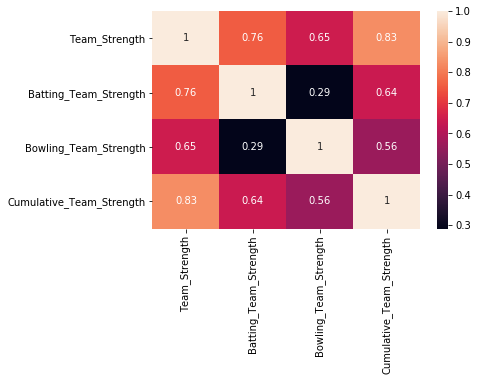

In [35]:
ax = sns.heatmap(TeamStrength.corr(), annot=True)

In [36]:
TeamStrength.head()

Team_Strength  Batting_Team_Strength  Bowling_Team_Strength  \
Team Year                                                                
CSK  2008      22.746533              17.146825              11.497391   
     2009      30.966321              21.192857              18.312296   
     2010      27.781762              17.410714              19.920292   
     2011      24.183259              14.083333              14.535135   
     2012      21.166494              15.984962              12.667610   

           Cumulative_Team_Strength  
Team Year                            
CSK  2008                 22.746533  
     2009                 30.966321  
     2010                 28.814597  
     2011                 27.026374  
     2012                 21.665932

In [37]:
TeamStrength.reset_index(inplace = True)

### <font color = 'blue'>We will use TeamStrength later and merge it with our final model</font>

# Win Ratio Ratio of each team vs another Calculations(AHP)

- Using Analytic Hierarchy Process (AHP) we will find the coefficient(weights) for win rate of each team with respect to the other
- https://www.youtube.com/watch?v=J4T70o8gjlk&t=17s
- The below codes are the standard process(algorithm) for the AHP and can be avoided 

In [38]:
Data = match_data.copy()

We are dropping KTK and GL Teams temporarily because these teams have not played against each other.

In [39]:
# Dropping teams who hasn't played against each other
Data.drop(Data[Data["TEAM1"] == "KTK"].index, inplace = True) 
Data.drop(Data[Data["TEAM2"] == "KTK"].index, inplace = True) 
Data.drop(Data[Data["TEAM1"] == "GL"].index, inplace = True) 
Data.drop(Data[Data["TEAM2"] == "GL"].index, inplace = True) 

In [40]:
#Creating Selector variable of form 'TEAMBig v/s TEAMSmall'
Data['Selector'] = ''
Data['Selector'][Data['TEAM1']>Data['TEAM2']] = Data['TEAM1'][Data['TEAM1']>Data['TEAM2']] + " v/s " + Data['TEAM2'][Data['TEAM1']>Data['TEAM2']]
Data['Selector'][Data['TEAM1']<Data['TEAM2']] = Data['TEAM2'][Data['TEAM1']<Data['TEAM2']] + " v/s " + Data['TEAM1'][Data['TEAM1']<Data['TEAM2']]

Data = Data[["Selector", "WINNER"]]

C:\Users\khand\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\khand\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [41]:
#Applying groupby to find winner count
df = pd.DataFrame(Data.groupby('Selector').apply(lambda a: a['WINNER'].value_counts())).reset_index()

#Initializing Win Ratio Column
df['Win Ratio']=0

In [42]:
Data = Data[["Selector", "WINNER"]]
Data.head()

,Selector,WINNER
0,RCB v/s KKR,KKR
1,KXIP v/s CSK,CSK
2,RR v/s DD,DD
3,RCB v/s MI,RCB
4,SRH v/s KKR,KKR


In [43]:
#Applying groupby to find winner count
df = pd.DataFrame(Data.groupby('Selector').apply(lambda a: a['WINNER'].value_counts())).reset_index()

#Initializing Win Ratio Column
df['Win Ratio']=0
#df['AHP']=0

df.head()

,Selector,level_1,WINNER,Win Ratio
0,DD v/s CSK,CSK,15,0
1,DD v/s CSK,DD,6,0
2,KKR v/s CSK,CSK,13,0
3,KKR v/s CSK,KKR,7,0
4,KKR v/s DD,KKR,13,0


In [44]:
#Computing Win Ratio using WINNER feature
for i in range(0, 72, 2):
    df["Win Ratio"].iloc[i] = df["WINNER"].iloc[i]/df["WINNER"].iloc[i+1]
    df["Win Ratio"].iloc[i+1] = df["WINNER"].iloc[i+1]/df["WINNER"].iloc[i]

C:\Users\khand\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


# AHP Matrix

- <font color = 'red'> This is the final matrix that we got after the AHP process </font>
- Matrix meaning:
- Eg CSK row:
- DD value is 2.5 it means CSK win rate against DD is 2.5 times more. Bascically CSK has 2.5 times more importance than DD. Similarly 1.85 times more importance than KKR


In [45]:
#Initializing Null Dataframe for pair-wise weight matrix 
Teams = df.level_1.unique()
init_df = pd.DataFrame([], index = Teams, columns = Teams)

#Assigning pair-wise weights using win ratio
for i in range(0,init_df.shape[0]):               #Iteration over rows in init_df
    for j in range(0,init_df.shape[0]):           #Iteration over columns in init_df
        
        if i == j:                                #Enters if element is diagonal
            init_df.iloc[i,j] = 1
    
        elif i != j:                              #Enters if element is non-diagonal
            #Creating Selector variable for given pair
            if init_df.columns[j]>init_df.index[i]: 
                a = init_df.columns[j]+" v/s "+init_df.index[i]
            if init_df.columns[j]<init_df.index[i]:
                a = init_df.index[i]+" v/s "+init_df.columns[j]
            
            #Assigns Win Ratio(column index 3) as pair-wise weight 
            init_df.iloc[i,j] = \
            df[(df['Selector'] == a) & (df['level_1'] == init_df.index[i])].iloc[0,3]

init_df

,CSK,DD,KKR,KXIP,MI,RCB,RPS,RR,SRH
CSK,1,2.5,1.85714,1.33333,0.6875,2.14286,2,2,2.14286
DD,0.4,1,0.769231,0.642857,1,0.571429,1.25,0.727273,1
KKR,0.538462,1.3,1,2.125,0.315789,1.4,3.5,1,1.88889
KXIP,0.75,1.55556,0.470588,1,0.846154,1,1,0.9,0.846154
MI,1.45455,1,3.16667,1.18182,1,1.77778,1.4,1,1.18182
RCB,0.466667,1.75,0.714286,1,0.5625,1,3.5,0.7,0.785714
RPS,0.5,0.8,0.285714,1,0.714286,0.285714,1,0.25,0.666667
RR,0.5,1.375,1,1.11111,1,1.42857,4,1,1.5
SRH,0.466667,1,0.529412,1.18182,0.846154,1.27273,1.5,0.666667,1


# Process Verification for AHP

- This is the verification Code for AHP. It verifies that the ratios are consistent 
- Condition : Consistency Ratio < 0.1

In [46]:
def AHP(df,random_index):
    """Reads Dataframe of numerical pair-wise order columns & random index and
    returns an array of criteria weights if consistency ratio i.e. CR<0.1 is satisfied."""

    matrix=np.mat(df)         #Conveting df to numpy matrix
        
    n=matrix.shape[0]              #Extracting matrix size
    
    if n != matrix.shape[1]:       #Dimension check
        print('Input matrix is not square.\Please verify the matrix dimensions.')
    elif np.multiply(matrix.T,matrix).round(decimals=5).sum()%1 != 0:       #Trnspose elements inverse check
        print('Transpose elements are not reciprocal.\nPlease verify the weights.')
    else:                          #Enters AHP algorithm
        #Pair-wise weight matrix divided column sums
        mat1 = np.divide(matrix, matrix.sum(axis=0))
        
        #Criteria weights computed by Row-wise mean of mat1
        criteria_weights = mat1.mean(axis=1)
        
        #Weighted sum computed by element wise multiplication of pair-wise matrix with criteria weight followed by
        #row-wise addition
        weighted_sum = np.multiply(matrix, criteria_weights.T).sum(axis=1)
        
        #lamda computed by averaging of ratio of weighted sum and criteria weights
        lambda_max = (weighted_sum/criteria_weights).mean()
    
        #CI & CR Calculation
        consistency_index = (lambda_max-n)/(n-1)
        consistency_ratio = consistency_index/random_index

        if consistency_ratio<0.1:
            print(f'Consistency Ratio {consistency_ratio:.4} satisfies CR < 0.1 condition')
            return criteria_weights
        else:
            print(f'Consistency Ratio {consistency_ratio:.4} does not satisfy CR < 0.1 condition')
            return None

In [47]:
weights = AHP(init_df.astype('float'), 1.45)

Consistency Ratio 0.04966 satisfies CR < 0.1 condition


## <font color = 'red'>Final Coefficients that we recieved after the AHP Process</red>

In [48]:
Team_criteria_weights= pd.DataFrame(weights, index = init_df.index).sort_values(by=0)
Team_weights = Team_criteria_weights/Team_criteria_weights.median()
Team_weights

,0
RPS,0.604341
DD,0.809025
SRH,0.904243
KXIP,0.939665
RCB,1.000000
RR,1.271740
KKR,1.276790
MI,1.518754
CSK,1.693047


## We have given rankings to the AHP weights highest will be 1 

In [49]:
Team_priority_using_AHP = TeamStrength.iloc[:,[0,1]]
Team_priority_using_AHP.head()

,Team,Year
0,CSK,2008
1,CSK,2009
2,CSK,2010
3,CSK,2011
4,CSK,2012


In [50]:
for team in Team_weights.index:
    
    i = Team_priority_using_AHP[Team_priority_using_AHP['Team']==team].index
    Team_priority_using_AHP.loc[i,'AHP'] = Team_weights.loc[team,0]

C:\Users\khand\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\khand\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [51]:
Team_priority_using_AHP=Team_priority_using_AHP.fillna(1)

In [52]:
Team_priority_using_AHP = Team_priority_using_AHP.round(5)

In [53]:
Team_priority_using_AHP['AHP'].unique()

array([1.69305, 0.80903, 1.     , 1.27679, 0.93966, 1.51875, 0.60434,
       1.27174, 0.90424])

In [54]:
dictw={1.69305:1, 0.80903:8, 1.:5, 1.27679:3, 0.93966:6,
       1.51875:2, 0.60434:9, 1.27174:4 , 0.90424:7 }

- Adding the AHP values that we got into the main model

In [55]:
Team_priority_using_AHP = Team_priority_using_AHP.replace(dictw)
Team_priority_using_AHP.head()

,Team,Year,AHP
0,CSK,2008,1.0
1,CSK,2009,1.0
2,CSK,2010,1.0
3,CSK,2011,1.0
4,CSK,2012,1.0


<font color ='red'>
 Conclusion for AHP Process:<br/>
 We are finding ranks of team (each year) on the basis of win ratios among the teams
    </font>

# AHP Player Strength 

- We have used a method (AHP) to calculate the strength of a player(Batting and Bowling Strength)
- Batting Strength = C1*average + C2*no. of innings + C3*SR + C4*Fifties +
    C5*Centuries – C6*Zeros 
- We will find the coefficients C1,C2... with the help of AHP
- Similarly for Bowling Strength

In [56]:
player_ahp = all_years_player_performance.drop(['Batting Strength', 'Bowling Strength', \
                                               'Strength', 'Strength For Model', 'Bat Strength For Model', \
                                               'Bowl Strength For Model', \
                                               'Cumul Strength For Model'], axis=1).copy()

In [57]:
player_ahp.head()

,Player,Matches,Batting Innings,Not out,Runs,High Score,Batting Average,Balls Faced,Batting SR,100's,...,Wickets,Bowling Average,Bowling Economy,Bowling SR,4W Haul,5W Haul,Catches,Stumpings,Year,Team
0,MEK Hussey,4,3,1,168,116,84.0,100,168.00,1,...,0,0.00,0.00,0.0,0,0,2,0,2008,CSK
1,M Ntini,9,2,1,11,11,11.0,18,61.11,0,...,7,34.57,6.91,30.0,1,0,1,0,2008,CSK
2,ML Hayden,4,4,1,189,81,63.0,131,144.27,0,...,0,0.00,0.00,0.0,0,0,0,0,2008,CSK
3,M Muralitharan,15,1,0,0,0,0.0,3,0.00,0,...,11,36.72,6.96,31.6,0,0,4,0,2008,CSK
4,MS Dhoni,16,14,4,414,65,41.4,310,133.54,0,...,0,0.00,0.00,0.0,0,0,6,0,2008,CSK


- Defining the priorities 1 is the highest while 7 is the least

### AHP Batting Initial Matrix

![AHP batting](batting_ahp.png "AHP Batting Initial Matrix")

### AHP Bowling Initial Matrix

![AHP bowling](bowling_ahp.png "AHP Bowling Initial Matrix")

- The below constants(Coefficients) are calculated using the Excel and are the standard algorithm and can not be manipulated

In [58]:
def ahp_bat_strength(df):
    """
    Calculates Player Batting Strength using the formula calculated using AHP.
    """
    
    df["AHP_bat"] = 0.388726074*df["Batting Average"] + 0.260099468*df["Batting Innings"]\
                  + 0.175428513*df["Batting SR"] + 0.083438652*df["50's"]\
                  + 0.055018035*df["100's"] + 0.037289258*df["0's"]
    

def ahp_bowl_strength(df):
    """
    Calculates Player Bowling Strength using the formula calculated using AHP.
    """
    
    df["AHP_bowl"] = 0.387508576*df["Overs"] + 0.281308382*df["Bowling Economy"]\
                  + 0.158764794*df["Wickets"] + 0.073609038*df["Bowling Average"]\
                  + 0.067861912*df["Bowling SR"] + 0.030947298*df["4W Haul"]
    
ahp_bat_strength(player_ahp)
ahp_bowl_strength(player_ahp)

In [59]:
player_ahp = player_ahp[['Year', 'Team', 'Player', 'AHP_bat', 'AHP_bowl']]
player_ahp

,Year,Team,Player,AHP_bat,AHP_bowl
0,2008,CSK,MEK Hussey,62.960297,0.000000
1,2008,CSK,M Ntini,15.516622,21.229464
2,2008,CSK,ML Hayden,51.006089,0.000000
3,2008,CSK,M Muralitharan,0.297389,31.027177
4,2008,CSK,MS Dhoni,43.328253,0.000000
...,...,...,...,...,...
2018,2019,SRH,DJ Hooda,23.821834,6.247653
2019,2019,SRH,Basil Thampi,17.802951,7.226888
2020,2019,SRH,S Nadeem,0.000000,11.762869
2021,2019,SRH,RK Bhui,13.213927,0.000000


In [60]:
player_ahp["AHP_bat"].min(), player_ahp["AHP_bat"].max()

(0.0, 87.40383884089)

In [61]:
player_ahp["AHP_bowl"].min(), player_ahp["AHP_bowl"].max()

(0.0, 40.39204295606)

## We need to scale the values the AHP columns

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
player_ahp.iloc[:, 3:] = scaler.fit_transform(player_ahp.iloc[:, 3:])

In [63]:
player_ahp

,Year,Team,Player,AHP_bat,AHP_bowl
0,2008,CSK,MEK Hussey,0.720338,0.000000
1,2008,CSK,M Ntini,0.177528,0.525585
2,2008,CSK,ML Hayden,0.583568,0.000000
3,2008,CSK,M Muralitharan,0.003402,0.768151
4,2008,CSK,MS Dhoni,0.495725,0.000000
...,...,...,...,...,...
2018,2019,SRH,DJ Hooda,0.272549,0.154675
2019,2019,SRH,Basil Thampi,0.203686,0.178919
2020,2019,SRH,S Nadeem,0.000000,0.291217
2021,2019,SRH,RK Bhui,0.151182,0.000000


### Now the range of both AHP_bat and AHP_bowl is (0, 1)

In [64]:
player_ahp["AHP_bat+bowl"] = player_ahp["AHP_bat"] + player_ahp["AHP_bowl"]
player_ahp

,Year,Team,Player,AHP_bat,AHP_bowl,AHP_bat+bowl
0,2008,CSK,MEK Hussey,0.720338,0.000000,0.720338
1,2008,CSK,M Ntini,0.177528,0.525585,0.703113
2,2008,CSK,ML Hayden,0.583568,0.000000,0.583568
3,2008,CSK,M Muralitharan,0.003402,0.768151,0.771553
4,2008,CSK,MS Dhoni,0.495725,0.000000,0.495725
...,...,...,...,...,...,...
2018,2019,SRH,DJ Hooda,0.272549,0.154675,0.427224
2019,2019,SRH,Basil Thampi,0.203686,0.178919,0.382605
2020,2019,SRH,S Nadeem,0.000000,0.291217,0.291217
2021,2019,SRH,RK Bhui,0.151182,0.000000,0.151182


## Selecting the best 11 players from each team and each year

In [65]:
AhpStrength = player_ahp.groupby(['Year','Team'])['Year', 'Player','Team', 'AHP_bat', 'AHP_bowl', 'AHP_bat+bowl'].apply(lambda x: x.nlargest(11, columns=['AHP_bat+bowl']))
AhpStrength

C:\Users\khand\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Year           Player Team   AHP_bat  AHP_bowl  AHP_bat+bowl
Year Team                                                                   
2008 CSK  5     2008          MS Gony  CSK  0.475962  0.776761      1.252723
          7     2008        JA Morkel  CSK  0.480545  0.657122      1.137667
          3     2008   M Muralitharan  CSK  0.003402  0.768151      0.771553
          10    2008         JDP Oram  CSK  0.390047  0.374391      0.764438
          12    2008  Joginder Sharma  CSK  0.336867  0.418462      0.755329
...              ...              ...  ...       ...       ...           ...
2019 SRH  2005  2019      JM Bairstow  SRH  0.595689  0.000000      0.595689
          2016  2019  Shakib Al Hasan  SRH  0.223642  0.310768      0.534411
          2012  2019         KK Ahmed  SRH  0.003402  0.508980      0.512382
          2007  2019        MK Pandey  SRH  0.489348  0.000000      0.489348
          2017  2019           S Kaul  SRH  0.006378  0.463873      0.470251

[1100 rows x 6 columns]

In [66]:
AhpStrength.reset_index(drop=True, inplace=True)
AhpStrength

,Year,Player,Team,AHP_bat,AHP_bowl,AHP_bat+bowl
0,2008,MS Gony,CSK,0.475962,0.776761,1.252723
1,2008,JA Morkel,CSK,0.480545,0.657122,1.137667
2,2008,M Muralitharan,CSK,0.003402,0.768151,0.771553
3,2008,JDP Oram,CSK,0.390047,0.374391,0.764438
4,2008,Joginder Sharma,CSK,0.336867,0.418462,0.755329
...,...,...,...,...,...,...
1095,2019,JM Bairstow,SRH,0.595689,0.000000,0.595689
1096,2019,Shakib Al Hasan,SRH,0.223642,0.310768,0.534411
1097,2019,KK Ahmed,SRH,0.003402,0.508980,0.512382
1098,2019,MK Pandey,SRH,0.489348,0.000000,0.489348


# We have taken Some Assumptions in our model:
- Deccan Charges are the same as Sunrises Hyderabad
- Delhi Capitals are same as Delhi Daredevils
- Pune Warriors are same as Rising Pune

In [67]:
AhpStrength = AhpStrength.replace('PWI','RPS')
AhpStrength = AhpStrength.replace('PWI','RPS')
AhpStrength.loc[((AhpStrength['Year'] < 2016) & (AhpStrength['Team'] == 'DC')),'Team']='SRH'
AhpStrength.loc[((AhpStrength['Year'] > 2016) & (AhpStrength['Team'] == 'DC')),'Team']='DD'
Team_Ahp = AhpStrength.groupby(['Year', 'Team'])['AHP_bat','AHP_bowl','AHP_bat+bowl'].mean().reset_index()
AhpStrength.loc[((AhpStrength['Year'] > 2016) & (AhpStrength['Team'] == 'DC')),'Team']='DD'
AhpStrength.head()

C:\Users\khand\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,Year,Player,Team,AHP_bat,AHP_bowl,AHP_bat+bowl
0,2008,MS Gony,CSK,0.475962,0.776761,1.252723
1,2008,JA Morkel,CSK,0.480545,0.657122,1.137667
2,2008,M Muralitharan,CSK,0.003402,0.768151,0.771553
3,2008,JDP Oram,CSK,0.390047,0.374391,0.764438
4,2008,Joginder Sharma,CSK,0.336867,0.418462,0.755329


###  Merging the individual team player strength into the team strength

In [68]:
for a in AhpStrength.Player.unique():          #Iteration over Players
    
    #Series of years the player has played sorted in descending order
    b = AhpStrength[AhpStrength['Player']==a]['Year'].sort_values(ascending=False)
    
    #Mean ahp_bat strength of player over IPL
    c = AhpStrength[AhpStrength['Player']==a]['AHP_bat'].mean()
    #Mean ahp_bowl strength of player over IPL
    d = AhpStrength[AhpStrength['Player']==a]['AHP_bowl'].mean()
    #Mean ahp_bat+bowl strength of player over IPL
    e = AhpStrength[AhpStrength['Player']==a]['AHP_bat+bowl'].mean()
    
    
    for i in range(len(b)):                     #Iteration over the years
        if sum(b.isin([b[b.index[i]]-1])):      #enters if year-1 is present in b
            #copies value to stren_mod from previous year stren_calc
            AhpStrength.loc[b.index[i],'AHPM_bat'] = AhpStrength.loc[b.index[i+1],'AHP_bat']   
        else:                                   #enters when previous year is not available
            #Mean strength of player over IPL is imputed
            AhpStrength.loc[b.index[i],'AHPM_bat'] = c
            
        if sum(b.isin([b[b.index[i]]-1])):      #enters if year-1 is present in b
            #copies value to stren_mod from previous year stren_calc
            AhpStrength.loc[b.index[i],'AHPM_bowl'] = AhpStrength.loc[b.index[i+1],'AHP_bowl']   
        else:                                   #enters when previous year is not available
            #Mean strength of player over IPL is imputed
            AhpStrength.loc[b.index[i],'AHPM_bowl'] = d
            
        if sum(b.isin([b[b.index[i]]-1])):      #enters if year-1 is present in b
            #copies value to stren_mod from previous year stren_calc
            AhpStrength.loc[b.index[i],'AHPM_bat+bowl'] = AhpStrength.loc[b.index[i+1],'AHP_bat+bowl']   
        else:                                   #enters when previous year is not available
            #Mean strength of player over IPL is imputed
            AhpStrength.loc[b.index[i],'AHPM_bat+bowl'] = e
            
    

In [69]:
AhpStrength.drop(['AHP_bat', 'AHP_bowl', 'AHP_bat+bowl'],axis=1,inplace=True)

In [70]:
AhpStrength = AhpStrength.groupby(['Team','Year']).sum().reset_index()

In [71]:
AhpStrength.head()

,Team,Year,AHPM_bat,AHPM_bowl,AHPM_bat+bowl
0,CSK,2008,3.910677,3.776844,7.687521
1,CSK,2009,3.865522,4.553235,8.418757
2,CSK,2010,3.253596,5.100120,8.353716
3,CSK,2011,3.853226,3.926944,7.780170
4,CSK,2012,3.129688,4.891053,8.020741


### <font color = 'blue'>We will use AhpStrength later and merge it with our final model</font>

# Previous IPL Team Points
The previous year performance of the team is captured by loading the Points of that a team scored previous year and mean of points scored over all previous years

In [72]:
path = r'Data\ipl_points.csv'
PointFeature = pd.read_csv(path)
PointFeature = PointFeature[['Team','Year','Points']]
PointFeature.head()

,Team,Year,Points
0,MI,2019,18
1,CSK,2019,18
2,DD,2019,18
3,SRH,2019,12
4,KKR,2019,12


In [73]:
PointFeature.dtypes

Team      object
Year       int64
Points     int64
dtype: object

In [74]:
PointFeature['Points_for_model']=np.nan
PointFeature['Cumul_points_for_model']=np.nan

In [75]:
for team in PointFeature['Team'].unique():

    a = PointFeature[PointFeature['Team']==team]
    years=a['Year'].sort_values(ascending=False)

    mean_points = a['Points'].mean()

    for i in range(0,len(years)-1):
        PointFeature.loc[years.index[i],'Points_for_model'] = PointFeature.loc[years.index[i+1],'Points']

        if i < len(years):
            PointFeature.loc[years.index[i],'Cumul_points_for_model'] = PointFeature.loc[years.index[i+1:], 'Points'].mean()
        else:
            PointFeature.loc[years.index[i],'Cumul_points_for_model'] = mean_points

    PointFeature.loc[years.index[len(years)-1],'Points_for_model'] = mean_points
    PointFeature.loc[years.index[len(years)-1],'Cumul_points_for_model'] = mean_points


In [76]:
PointFeature.drop(['Points'],axis=1,inplace=True)

In [77]:
PointFeature.head()

,Team,Year,Points_for_model,Cumul_points_for_model
0,MI,2019,12.0,16.454545
1,CSK,2019,18.0,17.555556
2,DD,2019,10.0,12.454545
3,SRH,2019,18.0,13.818182
4,KKR,2019,16.0,14.909091


### <font color = 'blue'>We will use PointFeature later and merge it with our final model</font>

# Player Auction Data

path = 'Data/final_auction_data_complete2.csv'
AuctionData = pd.read_csv(path, usecols = ['Year', 'Team', 'Player', 'Price'])
AuctionData.replace(0,np.nan,inplace=True)

sum(AuctionData.Price.isnull())

for player in AuctionData.Player.unique():

    fill_index = AuctionData[(AuctionData['Player']==player) & ((AuctionData['Year']==2008)\
                                                            | (AuctionData['Year']==2009) |(AuctionData['Year']==2010))].index
    AuctionData.loc[fill_index, 'Price']=\
    AuctionData.loc[fill_index, 'Price'].fillna(method='ffill')

len(AuctionData[AuctionData.Price.isnull()])

# Merge DataFrames 

### This section is for merging the 2 dataframes 

- Match Data : Data containing all the match features
- Strength Data : Features that we had already builtbuilt (Team_priority_using_AHP , TeamStrength)
- Feature Data Format: ['Team', 'Year', 'Feature_1', 'Feature_2', ....] 

In [78]:
def feature_joiner(df1,df2):
    """Reads Dataframe containing match data (df1) & Dataframe containing Team Features (df2) and 
    returns df1 with additional features joined from df2
    
    df2 should be in this format:
    df2.columns = ['Team', 'Year', 'Feature_1', 'Feature_2', ....] """
    
    new_columns = list('TEAM1_'+df2.columns[2:])+list('TEAM2_'+df2.columns[2:])   #Extracting names of new columns
    n_features = int(len(new_columns)/2)                                          #Number of new features for a given team    
    
    df1 = pd.concat([df1, pd.DataFrame(columns = new_columns)],sort=False)        #Adding new columns to the original dataframe
    
    for team in df2.iloc[:,0].unique():   #Iteration over teams
        for year in df2[df2.iloc[:,0] == team].iloc[:,1].unique():    #Iteration over seasons
            #Reading index of rows with team in TEAM1 column
            i = df1[(df1.loc[:,'TEAM1'] == team) & (df1.loc[:,'SEASON'] == year)].index
            #Assigning values
            df1.iloc[i, -n_features*2:-n_features] = df2[(df2.iloc[:,0] == team) & (df2.iloc[:,1] == year)].iloc[:,2:].values
            
            #Reading index of rows with team in TEAM2 column
            j = df1[(df1.loc[:,'TEAM2'] == team) & (df1.loc[:,'SEASON'] == year)].index
            #Assigning values
            df1.iloc[j, -n_features:] = df2[(df2.iloc[:,0] == team) & (df2.iloc[:,1] == year)].iloc[:,2:].values
        
    return df1

#### Merging match_data(Main Table ) and TeamStrength(Strengths using Dream11)

In [79]:
Data = feature_joiner(match_data, TeamStrength)

#### Merging match_data(Main Table ) and AhpStrength(Strengths using Dream11)

In [80]:
Data = feature_joiner(Data, AhpStrength)

#### Merging match_data(Main Table ) and Team_priority_using_AHP(Strengths using Dream11)

In [81]:
Data = feature_joiner(Data, Team_priority_using_AHP)

#### Merging match_data(Main Table ) and Team_priority_using_AHP(Strengths using Dream11)

In [82]:
Data = feature_joiner(Data, PointFeature) 
Data.head().T

,0,1,2,3,4
ID,60,61,62,63,64
SEASON,2008,2008,2008,2008,2008
CITY,Bangalore,Chandigarh,Delhi,Mumbai,Kolkata
CITY_Corrrected,RCB,KXIP,DD,MI,KKR
TEAM1,KKR,CSK,DD,RCB,KKR
TEAM1_MODEL,1,1,1,1,1
TEAM2,RCB,KXIP,RR,MI,SRH
TEAM2_MODEL,0,0,0,0,0
TOSS_WINNER,RCB,CSK,RR,MI,SRH
TOSS_DECISION,field,bat,bat,bat,bat


# Interaction Features
<ul>
    <li><code>TEAMX_WINxSTREN</code> : Product of Win Rate and Team strengths</li>
    <li><code>TEAMX_WINxCUMSTREN</code> : Product of Win Rate and Cumulative Team strengths</li>
    <li><code>TEAMX_CONSISTENCY</code> : Weighted average of Strength and Cumulative strength </li>
</ul>

In [83]:
Data['TEAM1_WINxSTREN'] = Data['TEAM1_WIN_RATE']*Data['TEAM1_Team_Strength']
Data['TEAM1_WINxCUMSTREN'] = Data['TEAM1_WIN_RATE']*Data['TEAM1_Cumulative_Team_Strength']

Data['TEAM2_WINxSTREN'] = Data['TEAM2_WIN_RATE']*Data['TEAM2_Team_Strength']
Data['TEAM2_WINxCUMSTREN'] = Data['TEAM2_WIN_RATE']*Data['TEAM2_Cumulative_Team_Strength']


In [84]:
Data['TEAM1_CONSISTENCY'] = ((Data['TEAM1_Team_Strength'] * 0.8) + (Data['TEAM1_Cumulative_Team_Strength'] * 0.2)) / 2
Data['TEAM2_CONSISTENCY'] = ((Data['TEAM2_Team_Strength'] * 0.8) + (Data['TEAM2_Cumulative_Team_Strength'] * 0.2)) / 2

In [85]:
Data.columns

Index(['ID', 'SEASON', 'CITY', 'CITY_Corrrected', 'TEAM1', 'TEAM1_MODEL',
       'TEAM2', 'TEAM2_MODEL', 'TOSS_WINNER', 'TOSS_DECISION', 'RESULT',
       'WINNER', 'WIN_BY_RUNS', 'TOSS_WINNER_MODEL', 'WINNER_MODEL',
       'TOSS_DECISION_MODEL', 'CITY_MODEL', 'TEAM1_WIN_RATE', 'TEAM2_WIN_RATE',
       'TEAM1_Team_Strength', 'TEAM1_Batting_Team_Strength',
       'TEAM1_Bowling_Team_Strength', 'TEAM1_Cumulative_Team_Strength',
       'TEAM2_Team_Strength', 'TEAM2_Batting_Team_Strength',
       'TEAM2_Bowling_Team_Strength', 'TEAM2_Cumulative_Team_Strength',
       'TEAM1_AHPM_bat', 'TEAM1_AHPM_bowl', 'TEAM1_AHPM_bat+bowl',
       'TEAM2_AHPM_bat', 'TEAM2_AHPM_bowl', 'TEAM2_AHPM_bat+bowl', 'TEAM1_AHP',
       'TEAM2_AHP', 'TEAM1_Points_for_model', 'TEAM1_Cumul_points_for_model',
       'TEAM2_Points_for_model', 'TEAM2_Cumul_points_for_model',
       'TEAM1_WINxSTREN', 'TEAM1_WINxCUMSTREN', 'TEAM2_WINxSTREN',
       'TEAM2_WINxCUMSTREN', 'TEAM1_CONSISTENCY', 'TEAM2_CONSISTENCY'],
      dty

# Difference Features
The absolute values may not sometimes immediately capture the win trends and therefore we create difference features<br>
<pre>DIFF_FEATURE = TEAM1_FEATURE-TEAM2_FEATURE
</pre>

In [86]:
Diff_Features = Data.columns[Data.columns.str.contains('TEAM1_')].str.replace('TEAM1_','DIFF_').drop('DIFF_MODEL')
Diff_Features

Index(['DIFF_WIN_RATE', 'DIFF_Team_Strength', 'DIFF_Batting_Team_Strength',
       'DIFF_Bowling_Team_Strength', 'DIFF_Cumulative_Team_Strength',
       'DIFF_AHPM_bat', 'DIFF_AHPM_bowl', 'DIFF_AHPM_bat+bowl', 'DIFF_AHP',
       'DIFF_Points_for_model', 'DIFF_Cumul_points_for_model',
       'DIFF_WINxSTREN', 'DIFF_WINxCUMSTREN', 'DIFF_CONSISTENCY'],
      dtype='object')

In [87]:
Data[list('TEAM1_'+Diff_Features.str.replace('DIFF_',''))+list('TEAM2_'+Diff_Features.str.replace('DIFF_',''))]=\
Data[list('TEAM1_'+Diff_Features.str.replace('DIFF_',''))+list('TEAM2_'+Diff_Features.str.replace('DIFF_',''))].astype('float64',copy=True)

In [88]:
for f in Diff_Features:
    Data[f] = Data['TEAM1_'+f.replace('DIFF_','')]-Data['TEAM2_'+f.replace('DIFF_','')]


In [89]:
Ratio_Features = Data.columns[Data.columns.str.contains('TEAM1_')].str.replace('TEAM1_','RATIO_').drop('RATIO_MODEL')
Ratio_Features

Index(['RATIO_WIN_RATE', 'RATIO_Team_Strength', 'RATIO_Batting_Team_Strength',
       'RATIO_Bowling_Team_Strength', 'RATIO_Cumulative_Team_Strength',
       'RATIO_AHPM_bat', 'RATIO_AHPM_bowl', 'RATIO_AHPM_bat+bowl', 'RATIO_AHP',
       'RATIO_Points_for_model', 'RATIO_Cumul_points_for_model',
       'RATIO_WINxSTREN', 'RATIO_WINxCUMSTREN', 'RATIO_CONSISTENCY'],
      dtype='object')

In [90]:
Data.head()

,ID,SEASON,CITY,CITY_Corrrected,TEAM1,TEAM1_MODEL,TEAM2,TEAM2_MODEL,TOSS_WINNER,TOSS_DECISION,...,DIFF_Cumulative_Team_Strength,DIFF_AHPM_bat,DIFF_AHPM_bowl,DIFF_AHPM_bat+bowl,DIFF_AHP,DIFF_Points_for_model,DIFF_Cumul_points_for_model,DIFF_WINxSTREN,DIFF_WINxCUMSTREN,DIFF_CONSISTENCY
0,60.0,2008.0,Bangalore,RCB,KKR,1.0,RCB,0.0,RCB,field,...,2.584136,0.332540,-1.157258,-0.824717,-2.0,1.000000,1.000000,0.000000,0.000000,1.292068
1,61.0,2008.0,Chandigarh,KXIP,CSK,1.0,KXIP,0.0,CSK,bat,...,-0.978659,-0.650308,-0.094796,-0.745103,-5.0,4.100000,4.100000,0.000000,0.000000,-0.489329
2,62.0,2008.0,Delhi,DD,DD,1.0,RR,0.0,RR,bat,...,1.137062,-0.629398,0.015429,-0.613969,4.0,-1.983333,-1.983333,0.000000,0.000000,0.568531
3,63.0,2008.0,Mumbai,MI,RCB,1.0,MI,0.0,MI,bat,...,-4.434419,-0.320186,0.307459,-0.012727,3.0,-2.916667,-2.916667,0.000000,0.000000,-2.217210
4,64.0,2008.0,Kolkata,KKR,KKR,1.0,SRH,0.0,SRH,bat,...,0.983532,0.290163,-0.782880,-0.492717,-4.0,1.000000,1.000000,27.060604,27.060604,0.491766


In [91]:
Data.dropna(inplace = True)

In [92]:
Data.isnull().sum()

ID                                0
SEASON                            0
CITY                              0
CITY_Corrrected                   0
TEAM1                             0
TEAM1_MODEL                       0
TEAM2                             0
TEAM2_MODEL                       0
TOSS_WINNER                       0
TOSS_DECISION                     0
RESULT                            0
WINNER                            0
WIN_BY_RUNS                       0
TOSS_WINNER_MODEL                 0
WINNER_MODEL                      0
TOSS_DECISION_MODEL               0
CITY_MODEL                        0
TEAM1_WIN_RATE                    0
TEAM2_WIN_RATE                    0
TEAM1_Team_Strength               0
TEAM1_Batting_Team_Strength       0
TEAM1_Bowling_Team_Strength       0
TEAM1_Cumulative_Team_Strength    0
TEAM2_Team_Strength               0
TEAM2_Batting_Team_Strength       0
TEAM2_Bowling_Team_Strength       0
TEAM2_Cumulative_Team_Strength    0
TEAM1_AHPM_bat              

In [93]:
# i = len(Data.columns)

# for z in range(0, i):
#     feature = Data.columns[z]
#     fig = plt.figure(figsize=(8,5))
#     ax = fig.gca()
#     Data[feature].hist(ax = ax);
#     plt.title(feature)
#     plt.savefig('fig_' + str(z) + '.png')

In [94]:
i

0

C:\Users\khand\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


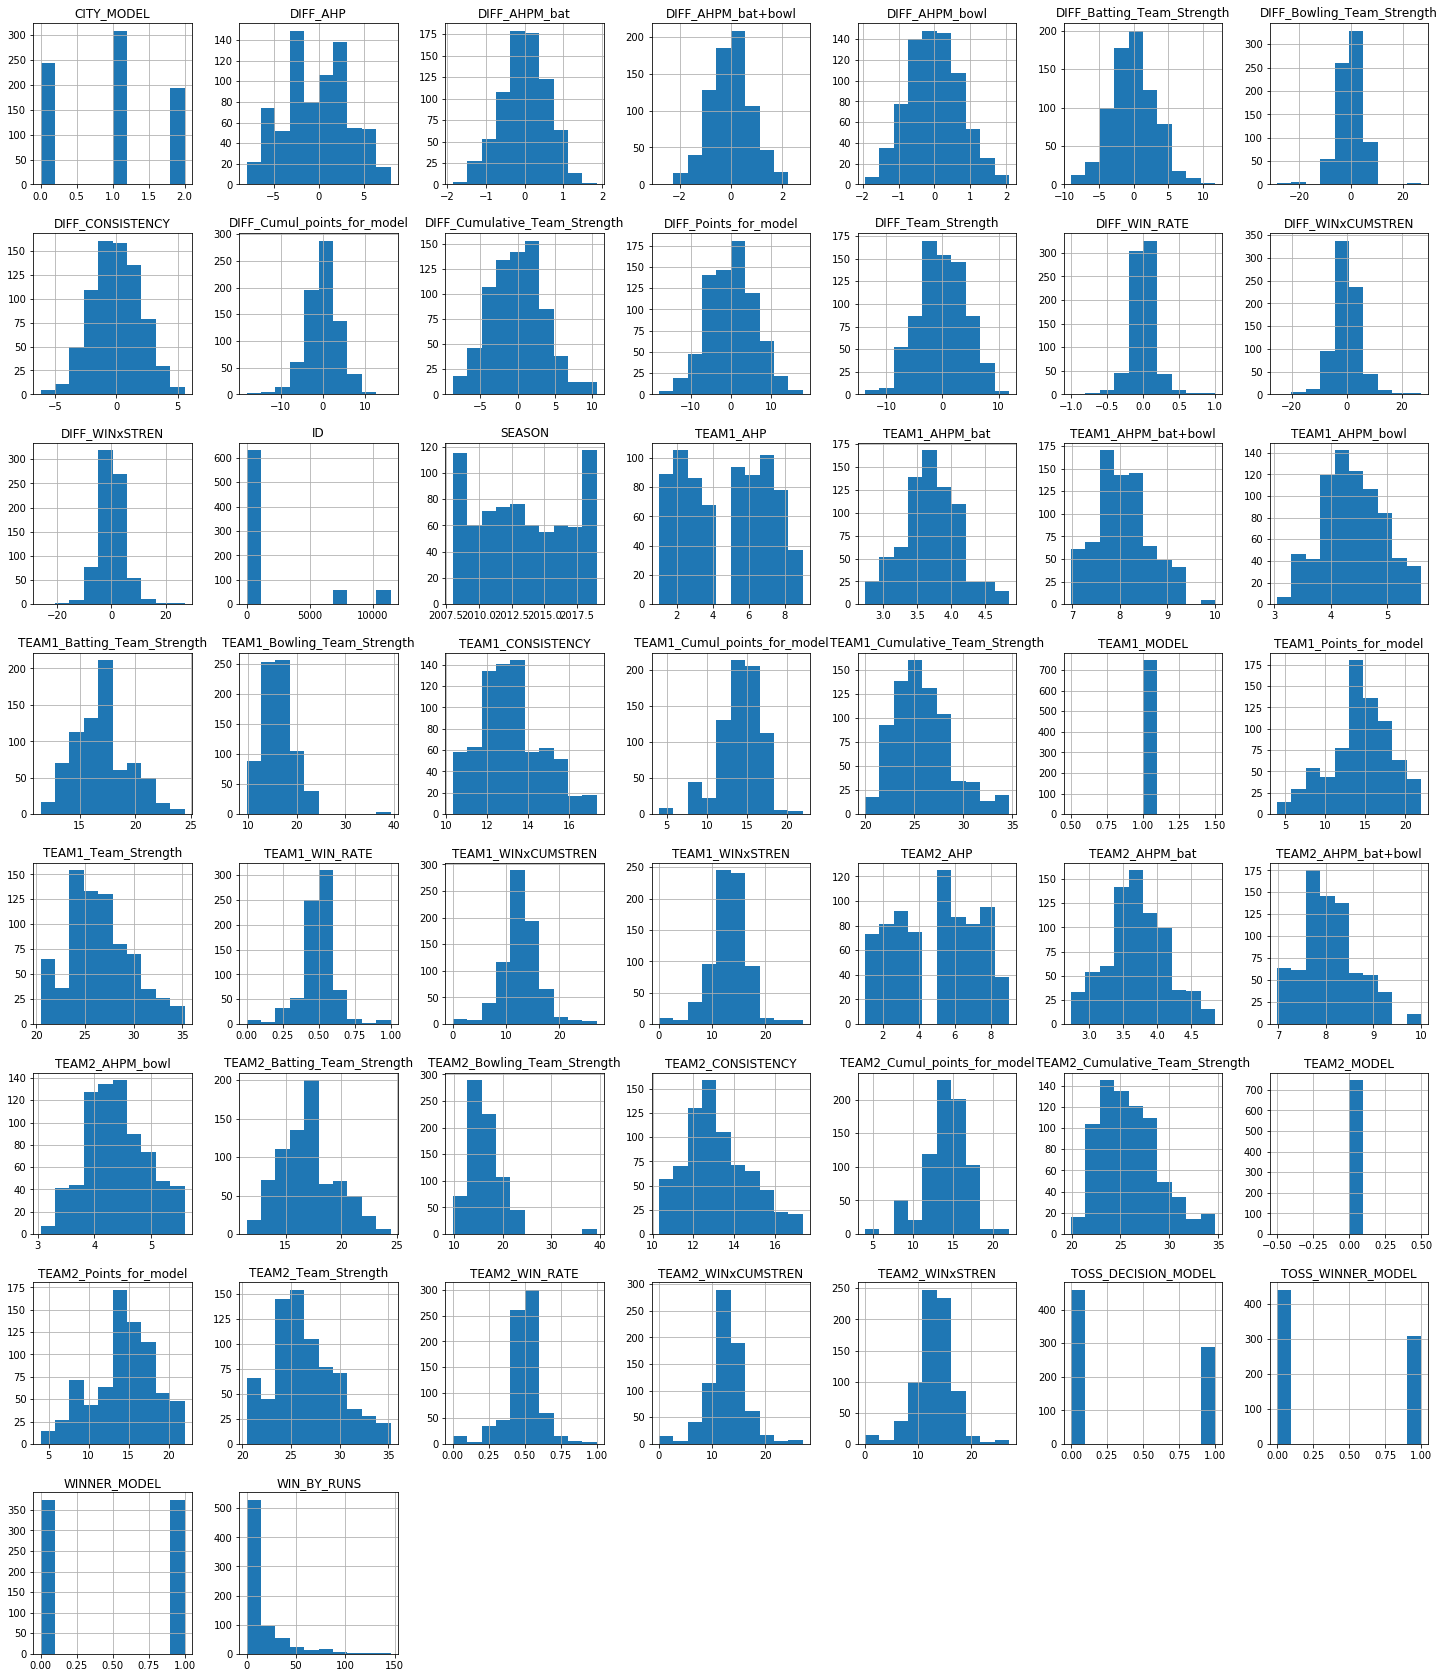

In [95]:
fig = plt.figure(figsize=(25, 30))
ax = fig.gca()
Data.hist(ax = ax);

In [96]:
# # Dropiing the base features
# Data.drop(['ID', 'SEASON', 'CITY', 'CITY_Corrrected', 'TEAM1', 'TEAM1_MODEL',
#        'TEAM2', 'TEAM2_MODEL', 'TOSS_WINNER', 'TOSS_DECISION', 'RESULT',
#        'WINNER', 'WIN_BY_RUNS', 'TOSS_WINNER_MODEL', 'WINNER_MODEL',
#        'TOSS_DECISION_MODEL', 'CITY_MODEL'], axis=1, inplace=True)

# Feature and Label Splitting

In [97]:
X = Data.drop(['ID','CITY',
             'CITY_Corrrected', 
             'TEAM1', 'TEAM2', 
             'TEAM1_MODEL', 'TEAM2_MODEL', 
             'TOSS_WINNER', 'TOSS_DECISION', 'RESULT', 
             'WINNER','WINNER_MODEL',
             'WIN_BY_RUNS'],axis=1)

In [98]:
y = Data['WINNER_MODEL'] 

In [99]:
X.head()

,SEASON,TOSS_WINNER_MODEL,TOSS_DECISION_MODEL,CITY_MODEL,TEAM1_WIN_RATE,TEAM2_WIN_RATE,TEAM1_Team_Strength,TEAM1_Batting_Team_Strength,TEAM1_Bowling_Team_Strength,TEAM1_Cumulative_Team_Strength,...,DIFF_Cumulative_Team_Strength,DIFF_AHPM_bat,DIFF_AHPM_bowl,DIFF_AHPM_bat+bowl,DIFF_AHP,DIFF_Points_for_model,DIFF_Cumul_points_for_model,DIFF_WINxSTREN,DIFF_WINxCUMSTREN,DIFF_CONSISTENCY
0,2008.0,0.0,0.0,0.0,0.0,0.0,27.060604,16.877905,18.173719,27.060604,...,2.584136,0.332540,-1.157258,-0.824717,-2.0,1.000000,1.000000,0.000000,0.000000,1.292068
1,2008.0,1.0,1.0,0.0,0.0,0.0,22.746533,17.146825,11.497391,22.746533,...,-0.978659,-0.650308,-0.094796,-0.745103,-5.0,4.100000,4.100000,0.000000,0.000000,-0.489329
2,2008.0,0.0,1.0,1.0,0.0,0.0,25.475121,17.403772,14.512405,25.475121,...,1.137062,-0.629398,0.015429,-0.613969,4.0,-1.983333,-1.983333,0.000000,0.000000,0.568531
3,2008.0,0.0,1.0,0.0,0.0,0.0,24.476468,16.341837,12.754320,24.476468,...,-4.434419,-0.320186,0.307459,-0.012727,3.0,-2.916667,-2.916667,0.000000,0.000000,-2.217210
4,2008.0,0.0,1.0,1.0,1.0,0.0,27.060604,16.877905,18.173719,27.060604,...,0.983532,0.290163,-0.782880,-0.492717,-4.0,1.000000,1.000000,27.060604,27.060604,0.491766


# Solving the Asymmetry: Mirroring the Data

|TEAM1|TEAM2|TEAM1_STRENGTH|TEAM2_STRENGTH|WINNER|
|-----|-----|--------------|--------------|------|
|CSK|MI|X|Y|1|


When we consider the above row, it is apparent to a human that when TEAM1 & TEAM2 are switched, the results will still be the same. However, to a model this is not apparent and hence we need to input the this information.<br>
Therefore, we mirror each row in the training set so that the model understands both the cases

|TEAM1|TEAM2|TEAM1_STRENGTH|TEAM2_STRENGTH|WINNER|
|-----|-----|--------------|--------------|------|
|CSK|MI|X|Y|1|
|MI|CSK|Y|X|0|


Steps invloved in creating the train and test sets:
<ol>
    <li>The original dataset is split using <code>train_test_split</code> into training and test sets</li>
    <li>The training set is then mirrored as shown above and append to the orginal training set which result in the number of rows being doubled</li>
    <li>The test set is also mirrored but we don't append them and create two test sets</li>
</ol>

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
def symmetric_splitting(X,Y, split_size=0.1, test_index=None, random=0):

    if test_index is None: 
        #Splitting the Data into train and test
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=split_size, random_state=random)
    else:
        X_train, X_test, y_train, y_test = X.drop(test_index), X.loc[test_index,:], Y.drop(test_index), Y.loc[test_index]
    
    #Training Set mirrored and merged
    Xsyn_train=pd.DataFrame([],columns=X_train.columns)

    Xsyn_train['SEASON'] = X_train['SEASON']
    Xsyn_train['TOSS_DECISION_MODEL'] = (X_train['TOSS_DECISION_MODEL']==1)*0+(X_train['TOSS_DECISION_MODEL']==0)*1
    Xsyn_train['TOSS_WINNER_MODEL'] = (X_train['TOSS_WINNER_MODEL']==1)*0+(X_train['TOSS_WINNER_MODEL']==0)*1
    Xsyn_train['CITY_MODEL'] =(X_train['CITY_MODEL']==1)*0+(X_train['CITY_MODEL']==0)*1+(X_train['CITY_MODEL']==2)*2
    
    Flip = Data.columns[Data.columns.str.contains('TEAM1_')].str.replace('TEAM1_','').drop('MODEL')
    Xsyn_train['TEAM1_'+Flip] = X_train['TEAM2_'+Flip]
    Xsyn_train['TEAM2_'+Flip] = X_train['TEAM1_'+Flip]
    
    Xsyn_train[Diff_Features]=-X_train[Diff_Features]
    
    ysyn_train = (y_train==1)*0+(y_train==0)*1
    
    Xsymm_train = X_train.append(Xsyn_train,ignore_index=True)
    ysymm_train = y_train.append(ysyn_train,ignore_index=True)
    
    #Test Set mirrored
    Xsyn_test=pd.DataFrame([],columns=X_train.columns)

    Xsyn_test['SEASON'] = X_test['SEASON']
    Xsyn_test['TOSS_DECISION_MODEL'] = (X_test['TOSS_DECISION_MODEL']==1)*0+(X_test['TOSS_DECISION_MODEL']==0)*1
    Xsyn_test['TOSS_WINNER_MODEL'] = (X_test['TOSS_WINNER_MODEL']==1)*0+(X_test['TOSS_WINNER_MODEL']==0)*1
    Xsyn_test['CITY_MODEL'] =(X_test['CITY_MODEL']==1)*0+(X_test['CITY_MODEL']==0)*1+(X_test['CITY_MODEL']==2)*2
    
    Xsyn_test['TEAM1_'+Flip] = X_test['TEAM2_'+Flip]
    Xsyn_test['TEAM2_'+Flip] = X_test['TEAM1_'+Flip]
    
    Xsyn_test[Diff_Features]=-X_test[Diff_Features]
    
    ysyn_test = (y_test==1)*0+(y_test==0)*1
    
    return Xsymm_train, ysymm_train, X_test, y_test, Xsyn_test, ysyn_test

In [102]:
X_train, y_train, X_test1, y_test1, X_test2, y_test2 = symmetric_splitting(X,y,split_size=0.1,random=101)

In [103]:
X_train.isnull().sum()

SEASON                            0
TOSS_WINNER_MODEL                 0
TOSS_DECISION_MODEL               0
CITY_MODEL                        0
TEAM1_WIN_RATE                    0
TEAM2_WIN_RATE                    0
TEAM1_Team_Strength               0
TEAM1_Batting_Team_Strength       0
TEAM1_Bowling_Team_Strength       0
TEAM1_Cumulative_Team_Strength    0
TEAM2_Team_Strength               0
TEAM2_Batting_Team_Strength       0
TEAM2_Bowling_Team_Strength       0
TEAM2_Cumulative_Team_Strength    0
TEAM1_AHPM_bat                    0
TEAM1_AHPM_bowl                   0
TEAM1_AHPM_bat+bowl               0
TEAM2_AHPM_bat                    0
TEAM2_AHPM_bowl                   0
TEAM2_AHPM_bat+bowl               0
TEAM1_AHP                         0
TEAM2_AHP                         0
TEAM1_Points_for_model            0
TEAM1_Cumul_points_for_model      0
TEAM2_Points_for_model            0
TEAM2_Cumul_points_for_model      0
TEAM1_WINxSTREN                   0
TEAM1_WINxCUMSTREN          

In [104]:
X_train.head().T

,0,1,2,3,4
SEASON,2011.000000,2012.000000,2017.000000,2013.000000,2012.000000
TOSS_WINNER_MODEL,0.000000,1.000000,0.000000,1.000000,0.000000
TOSS_DECISION_MODEL,0.000000,1.000000,0.000000,1.000000,0.000000
CITY_MODEL,0.000000,1.000000,0.000000,1.000000,1.000000
TEAM1_WIN_RATE,0.571429,0.562500,0.465278,0.617978,0.436364
TEAM2_WIN_RATE,0.576923,0.476190,0.471429,0.487805,0.500000
TEAM1_Team_Strength,24.183259,23.321563,30.131071,20.436569,22.140611
TEAM1_Batting_Team_Strength,14.083333,17.321662,17.476190,12.898148,15.806373
TEAM1_Bowling_Team_Strength,14.535135,15.548542,21.155204,12.288077,14.565094
TEAM1_Cumulative_Team_Strength,27.026374,23.733744,28.456008,21.912977,22.360168


# Model Ambiguity

The asymmetric nature of the model in a few rows leads to ambiguity in the results.<br>
For instance:

|TEST SET|TEAM1|TEAM2|WINNER|PREDICTION|
|--------|-----|-----|------|----------|
|    1   | KKR | KXIP|  1   |    1     |
|    2   | KXIP| KKR |  0   |    1     |


So in the above case, we have different predictions for same case. We will call such an occurance as Model Ambiguity. Note that this is not the same as incorrect prediction as the prediction will count correct in either test set 1 or test set 2.

Therefore we will evalute the model using 5 parameter rather than just training and test accuracy:
<ul>
    <li>Training Accuracy:  Percent of correct predictions in mirror and merged train set</li>
    <li>Test 1 Accuracy:    Percent of correct prediction in original test set</li>
    <li>Test 2 Accuracy:    Percent of correct prediction in mirrored test set</li>
    <li>Real Test Accuracy: Percent of correct prediction after discrediting the scores for ambiguous rows</li>
    <li>Ambiguity:          Percent of rows in which ambiguity is observed</li>
</ul>

In [105]:
def print_score(model,X_t,y_t,X_v1,y_v1,X_v2,y_v2, print_result=False):
    
    ambiguity = sum(model.predict(X_v1)==model.predict(X_v2))/len(model.predict(X_v1))
    
    ambi_rows = X_v1[model.predict(X_v1)==model.predict(X_v2)]
    real_test_score = model.score(X_v1.drop(ambi_rows.index),y_v1.drop(ambi_rows.index))\
    *len(y_v1.drop(ambi_rows.index))/len(y_v1)
    
    if print_result == True:
        print(f"""Training Accuracy of the model:      {model.score(X_t,y_t):.3%}
Test 1 Accuracy of the model:        {model.score(X_v1,y_v1):.3%}
Test 2 Accuracy of the model:        {model.score(X_v2,y_v2):.3%}
True Test Accuracy of the model:     {real_test_score:.3%}
Ambiguity of the model:              {ambiguity:.3%}""")
    
    return model.score(X_t,y_t),model.score(X_v1,y_v1),model.score(X_v2,y_v2),real_test_score,ambiguity

# Modelling
We observed that Tree based classifier are performing better on this Data than other clasifiers.<br>So we primarily focused on Tree based classifiers and additionally support vector classifier.

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier


from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score

from sklearn.base import clone

### Loading the models to be tested along with the hyperparameters

In [107]:
RFC = RandomForestClassifier(n_estimators=800,
                             max_depth=5,
                             min_samples_leaf=5,
                             n_jobs=-1,
                             max_features='log2',
                             random_state=5)
#                             oob_score=True)

ETC = ExtraTreesClassifier(n_estimators = 500,
                             max_depth=5,
                             min_samples_leaf=4,
                             n_jobs=-1,
                             max_features='log2',
                             random_state=12)
#                             oob_score=True)

ABC = AdaBoostClassifier(n_estimators=200,
                         learning_rate = 0.5,
                         random_state=0)

XGC = XGBClassifier(n_estimators=700,
                    learning_rate=0.01,
                    max_depth=5)

SVMC = SVC()

MNB = MultinomialNB(alpha = 1)

GNB = GaussianNB()

LRE = LogisticRegression()

KNN = KNeighborsClassifier()

### The Random Forest Classifier is cloned and used to select top 10 features using <code>RFE</code>. The above defined models are evaluted using these selected features.

In [108]:
#mod = clone(RFC)
#selector = RFE(mod, n_features_to_select=10, step=1)
#selector = selector.fit(X_train, y_train)

In [109]:
#print_score(selector,X_train, y_train, X_test1, y_test1, X_test2, y_test2, print_result = True)

In [110]:
#A = X_train.columns[selector.support_]
#A

### Multi Model Evalution
Set the <code>split_ratio</code> for dividing train and test sets<br>
Change the <code>rand_st</code> to set the random states for <code>train_test_split</code><br>
Load the models defined earlier into <code>all_mod</code> for evaluation

In [111]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

import time

In [112]:
time_start = time.perf_counter()
#split_ratio=0.1
#rand_st = range(0,100,10)
skf = RepeatedStratifiedKFold(n_splits=11, n_repeats=5 , random_state=827)
all_mod = [SVMC]#ETC,# RFC, ABC, XGC, MNB]

df_metrics=pd.DataFrame([],columns=['Train Accuracy','Test Accuracy 1','Test Accuracy 2','Real Test Accuracy','Ambiguity'],
                        index=pd.MultiIndex(levels=[[],[]],codes=[[],[]],names=['Model','Random state']))

for model in all_mod:
#    for random_st in rand_st:
    for _,ts in skf.split(X,y):
        X_train, y_train, X_test1, y_test1, X_test2, y_test2 = symmetric_splitting(X,y, test_index=ts)
        
        #X_train = X_train[A]
        #X_test1 = X_test1[A]
        #X_test2 = X_test2[A]
        
        model.fit(X_train, y_train)
        TRA, TSA1, TSA2, RTA, AMB = print_score(model,X_train, y_train, X_test1, y_test1, X_test2, y_test2)
        
        mod_name = [k for k,v in globals().items() if v is model][0]
        bomb=pd.Series(dict(zip(df_metrics.columns,(np.array([TRA, TSA1, TSA2, RTA, AMB])*100).round(2))),
                       name=(mod_name,skf.random_state))
        df_metrics = df_metrics.append(bomb)

time_end = time.perf_counter()
df_metrics;

In [113]:
time.strftime("%M min %S sec",time.gmtime(time_end-time_start))

'00 min 17 sec'

In [114]:
acc_mean = df_metrics.loc[('SVMC'),:]['Real Test Accuracy'].mean()
acc_std = df_metrics.loc[('SVMC'),:]['Real Test Accuracy'].std()

print(f'Real Test Accuracy of the SVMC is {acc_mean:.4} ± {acc_std:.3} %')
print(f'Prediction Metrics for SVMC:')

df_metrics.loc[('SVMC'),:].describe().drop(['count',])# '25%', '50%', '75%'])

Real Test Accuracy of the SVMC is 58.42 ± 5.69 %
Prediction Metrics for SVMC:


,Train Accuracy,Test Accuracy 1,Test Accuracy 2,Real Test Accuracy,Ambiguity
mean,59.354364,58.443273,58.416545,58.416545,0.026727
std,0.685770,5.691162,5.685778,5.685778,0.198215
min,57.950000,44.780000,44.780000,44.780000,0.000000
25%,58.910000,54.410000,54.410000,54.410000,0.000000
50%,59.430000,58.820000,58.820000,58.820000,0.000000
75%,59.790000,61.475000,61.475000,61.475000,0.000000
max,60.740000,77.940000,77.940000,77.940000,1.470000


Kurtosis of the Real Test Accuracies: 1.6978975888725412
Skewness of the Real Test Accuracies: 0.41707285051815923


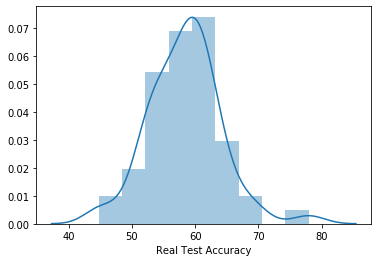

In [115]:
from scipy import stats

kurt = stats.kurtosis(df_metrics.loc[('SVMC'),:]['Real Test Accuracy'])
sk = stats.skew(df_metrics.loc[('SVMC'),:]['Real Test Accuracy'])

print(f'''Kurtosis of the Real Test Accuracies: {kurt}
Skewness of the Real Test Accuracies: {sk}''')

sns.distplot(df_metrics.loc[('SVMC'),:]['Real Test Accuracy'],);#norm_hist=True)

# Hyperparameter Tuning

### K Fold State selection

In [116]:
import itertools
from IPython.display import clear_output

In [117]:
def avg_acc(X,Y, hyperparam, model, rand_state=None, split_ratio=None):
    
    model.set_params(**hyperparam)
                  
    df_score=pd.DataFrame([],columns=['Train Accuracy','Real Test Accuracy','Ambiguity'],
                    index=pd.Series([],name='Random State'))
    
    skf = RepeatedStratifiedKFold(n_splits=11, n_repeats=5 , random_state=rand_state)
    
    for _, index in skf.split(X,y):
        X_train, y_train, X_test1, y_test1, X_test2, y_test2 = symmetric_splitting(X, Y, 
                                                                                   #split_size = split_ratio, 
                                                                                   #random = rand_st, 
                                                                                   test_index = index )
        model.fit(X_train, y_train)
        TRA, _, _, RTA, AMB = print_score(model,X_train, y_train, X_test1, y_test1, X_test2, y_test2)
        bomb = pd.Series(dict(zip(df_score.columns,(np.array([TRA, RTA, AMB])*100).round(2))),
                       name=(rand_state))
        df_score = df_score.append(bomb)
    if hyperparam == {}:
        return pd.Series(df_score.mean())
    else:
        return pd.Series(df_score.mean(),name = tuple(hyperparam.values()))

t_start = time.perf_counter()
B = pd.DataFrame([], columns=[],index=pd.MultiIndex(levels=[[],[]],codes=[[],[]],names=['Iteration','Random State']))
acc=0;i=0;

while acc<60:
    i=i+1
    iteration_start = time.perf_counter()
    rand_st = np.random.randint(1000) 
    A = avg_acc(X,y, {}, RFC, rand_state = rand_st)
    A.name = (i,rand_st)
    B = B.append(A)
    acc=A[1]
    clear_output()
    print(f'Iteration {i}\nRun Time: {time.perf_counter()-iteration_start:.6} secs')

print('Iterations completed in '+ time.strftime('%H hr %M min %S sec',time.gmtime(time.perf_counter()-t_start)))

B.loc[B['Real Test Accuracy'].argmax(),:]

A = avg_acc(X,y, {}, RFC, rand_state = 489)

### Hyperparameter Tuning

In [118]:
#Iteration set for Vatsal
param_grid_1={'n_estimators' : [400,500,600,700,800],
            'max_features' : ['log2','sqrt'],
            'min_samples_leaf' : [1,3,5],
            'criterion': ['gini','entropy'],
            'max_depth': [4],}#5,6]}

In [119]:
# #Iteration set for VJ
# param_grid_2={'n_estimators' : [100, 200, 600, 900, 1200, 1500, 1800, 2100],
#             'max_features' : ['sqrt', 'log2'],
#             'min_samples_leaf' : [3, 5, 8, 12],
#             'n_jobs': [-1],
#             'max_depth': [3, 4, 5, 12]}

In [120]:
#Iteration set for Ayush
param_grid_3={'n_estimators' : [400,500,600,700,800],
            'max_features' : ['sqrt'],
            'min_samples_leaf' : [1,3,5,7,9],
            'criterion': ['entropy'],
            'max_depth' : [6],}

In [121]:
param_grid_2 = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

In [122]:
# KNN
param_grid_2 = {'n_neighbors': [1, 3, 5, 8, 12, 15, 18],
                'weights': ['uniform', 'distance'],
                'metric': ['euclidean', 'manhattan'],
                'leaf_size': [10, 20, 30]}  

In [123]:
#Rashid/Ayush please look into Bayesian optimization library hyperopt

In [124]:
t_start = time.perf_counter()
B = pd.DataFrame([], columns=[], index=pd.MultiIndex(levels=[[]]*len(param_grid_2.keys()),
                                                     codes=[[]]*len(param_grid_2.keys()),
                                                     names=param_grid_2.keys()))
i=0

for a in itertools.product(*param_grid_2.values()):
    iteration_start=time.perf_counter()
    i=i+1
    A = avg_acc(X,y, dict(zip(param_grid_2.keys(), a)), KNN, rand_state=489)
    B = B.append(A)
    clear_output()
    print(f'Iteration {i}\nRun Time: {time.perf_counter()-iteration_start:.6} secs')
    
print('Iterations completed in '+ time.strftime('%H hr %M min %S sec',time.gmtime(time.perf_counter()-t_start)))

Iteration 84
Run Time: 11.7678 secs
Iterations completed in 00 hr 20 min 14 sec


In [125]:
SVMC.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [126]:
B.sort_values(by='Real Test Accuracy', ascending= False, inplace=True)
B

Ambiguity  Real Test Accuracy  \
n_neighbors weights  metric    leaf_size                                  
3           uniform  manhattan 30          0.749818           54.622727   
                               20          0.749818           54.622727   
                               10          0.749818           54.622727   
12          distance manhattan 30          0.883636           53.526545   
                               20          0.883636           53.526545   
...                                             ...                 ...   
8           uniform  manhattan 20         23.544182           41.256727   
                               30         23.544182           41.256727   
                     euclidean 10         23.858727           40.671455   
                               30         23.858727           40.671455   
                               20         23.858727           40.671455   

                                          Train Accuracy  
n_neighbors weights  metric    leaf_size                  
3           uniform  manhattan 30              77.396000  
                               20              77.396000  
                               10              77.396000  
12          distance manhattan 30             100.000000  
                               20             100.000000  
...                                                  ...  
8           uniform  manhattan 20              64.725636  
                               30              64.725636  
                     euclidean 10              64.539091  
                               30              64.539091  
                               20              64.539091  

[84 rows x 3 columns]

In [127]:
B.to_csv("SVMC_model.csv")

In [128]:
X

,SEASON,TOSS_WINNER_MODEL,TOSS_DECISION_MODEL,CITY_MODEL,TEAM1_WIN_RATE,TEAM2_WIN_RATE,TEAM1_Team_Strength,TEAM1_Batting_Team_Strength,TEAM1_Bowling_Team_Strength,TEAM1_Cumulative_Team_Strength,...,DIFF_Cumulative_Team_Strength,DIFF_AHPM_bat,DIFF_AHPM_bowl,DIFF_AHPM_bat+bowl,DIFF_AHP,DIFF_Points_for_model,DIFF_Cumul_points_for_model,DIFF_WINxSTREN,DIFF_WINxCUMSTREN,DIFF_CONSISTENCY
0,2008.0,0.0,0.0,0.0,0.000000,0.000000,27.060604,16.877905,18.173719,27.060604,...,2.584136,0.332540,-1.157258,-0.824717,-2.0,1.000000,1.000000,0.000000,0.000000,1.292068
1,2008.0,1.0,1.0,0.0,0.000000,0.000000,22.746533,17.146825,11.497391,22.746533,...,-0.978659,-0.650308,-0.094796,-0.745103,-5.0,4.100000,4.100000,0.000000,0.000000,-0.489329
2,2008.0,0.0,1.0,1.0,0.000000,0.000000,25.475121,17.403772,14.512405,25.475121,...,1.137062,-0.629398,0.015429,-0.613969,4.0,-1.983333,-1.983333,0.000000,0.000000,0.568531
3,2008.0,0.0,1.0,0.0,0.000000,0.000000,24.476468,16.341837,12.754320,24.476468,...,-4.434419,-0.320186,0.307459,-0.012727,3.0,-2.916667,-2.916667,0.000000,0.000000,-2.217210
4,2008.0,0.0,1.0,1.0,1.000000,0.000000,27.060604,16.877905,18.173719,27.060604,...,0.983532,0.290163,-0.782880,-0.492717,-4.0,1.000000,1.000000,27.060604,27.060604,0.491766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,2019.0,0.0,0.0,0.0,0.622642,0.465517,24.525339,18.411765,13.268624,23.698668,...,-3.421591,0.797366,0.739800,1.537167,-5.0,6.000000,3.919192,0.894812,2.130826,-2.884462
743,2019.0,0.0,0.0,0.0,0.519774,0.576087,30.023767,17.428571,17.528486,25.894054,...,-0.679713,-0.225919,-0.237892,-0.463810,1.0,4.000000,-1.545455,-1.213716,-1.849744,0.263236
744,2019.0,1.0,1.0,1.0,0.618750,0.578378,24.525339,18.411765,13.268624,23.698668,...,-2.875099,1.120587,-0.622160,0.498427,-1.0,6.000000,1.101010,-1.711136,-0.706142,-2.155673
745,2019.0,0.0,0.0,2.0,0.478022,0.432749,27.659022,21.413333,13.147386,26.856992,...,1.438046,0.237694,0.405039,0.642734,-1.0,8.000000,1.363636,0.794289,1.838221,-0.279472


In [129]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
742    0.0
743    0.0
744    0.0
745    0.0
746    0.0
Name: WINNER_MODEL, Length: 747, dtype: float64

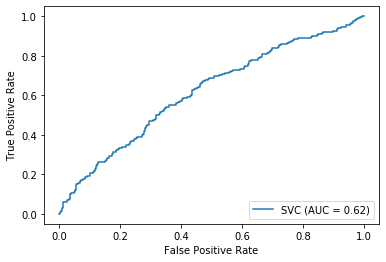

In [130]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(SVMC, X, y)

# ThreadPoolExecutor Code Below: Do not run beyond this

In [131]:
# from multiprocessing import Process, current_process
# import concurrent.futures

In [132]:
# B = pd.DataFrame([], columns=[], index=pd.MultiIndex(levels=[[]]*len(param_grid_2.keys()),
#                                                      codes=[[]]*len(param_grid_2.keys()),
#                                                      names=param_grid_2.keys()))
# #for a in itertools.product(*param_grid.values()):


# def nonrobust_hypertuner(a):
#     global B
#     A = avg_acc(X,y, dict(zip(param_grid_2.keys(), a)), RFC,rand_state=827)
#     B = B.append(A)
    
# t_end = time.perf_counter()

In [133]:
# t_start = time.perf_counter()

# with concurrent.futures.ThreadPoolExecutor() as executor:
# #    for a in itertools.product(*param_grid_2.values()):
#     executor.map(nonrobust_hypertuner,itertools.product(*param_grid_2.values()))
    
# #    for r in concurrent.futures.as_completed(result):
# #        print(r.result())
        

# print('Iterations completed in '+ time.strftime('%H hr %M min %S sec',time.gmtime(time.perf_counter()-t_start)))

In [134]:
# B